![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [195]:
#librerias
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
#Random forest librerías
from sklearn.ensemble import RandomForestClassifier


In [83]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()
data.shape

(10495, 10)

In [84]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [85]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1
#Jesica


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de clasificación y comenten sobre el desempeño del modelo.

In [233]:
# Celda 2
#Cristian
n_rows = len(X_train)
Lista_indices=[]
Predicciones = np.empty((0, len(X_test)))
N_Trees=10
for i in range(10):
    Lista_indices.append(np.random.randint(0, n_rows, n_rows))
    X_train_bootstrapped= X_train.iloc[Lista_indices[i]]
    y_train_bootstrapped=y_train.iloc[Lista_indices[i]]
    Reg_DTree = DecisionTreeRegressor(random_state=0).fit(X_train_bootstrapped,y_train_bootstrapped)
    y_pred_ind= Reg_DTree.predict(X_test)
    Predicciones = np.concatenate((Predicciones, np.expand_dims(y_pred_ind, axis=0)), axis=0)
y_pred=Predicciones.sum(axis=0)/N_Trees

MSE_bagging = np.sum(np.power(y_pred-y_test,2))/len(y_pred)
RMSE_bagging = np.sqrt(MSE_bagging)

SSres= sum(np.power(y_pred-y_test,2))
SStot = sum(np.power(y_pred-y_test.mean(),2))

R2 =  1 - (SSres / SStot)
print('El MSE del modelo es de: ' + str(MSE_bagging))
print('El RMSE del modelo es de: ' + str(RMSE_bagging))
print('El R2 del modelo es de: ' + str(R2))

El MSE del modelo es de: 3235288.9285628097
El RMSE del modelo es de: 1798.690893000465
El R2 del modelo es de: 0.7627171337952385


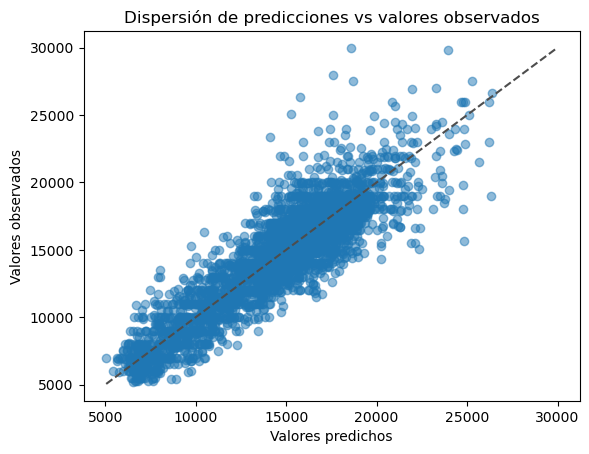

In [236]:
x_range = np.linspace(min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max()), 1000)

fig, ax = plt.subplots()
ax.plot(x_range, x_range, ls='--', c='.3')
ax.scatter(y_pred, y_test, alpha=.5)

ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')
ax.set_title('Dispersión de predicciones vs valores observados')

plt.show()

El modelo de regresión realizado con bagging manual y árboles de decisión como estimadores tiene un RMSE de 1796.8454281893548 y un R2 de 0.7641154583710322.

El valor del RMSE indica que el modelo tiene un error medio de predicción de aproximadamente 1796.85 unidades en la misma escala que la variable dependiente. Un valor alto de RMSE indica que el modelo no se ajusta bien a los datos de entrenamiento y que es posible que tenga problemas de sobreajuste.

El valor del R2 indica que el modelo es capaz de explicar el 76.41% de la variabilidad en la variable dependiente utilizando los predictores incluidos en el modelo. Un valor alto de R2 indica que el modelo es capaz de explicar una gran cantidad de la variabilidad en la variable dependiente y que es un buen ajuste para los datos.

En general, se puede concluir que el modelo de regresión realizado con bagging manual y árboles de decisión como estimadores tiene un desempeño moderado en la predicción de la variable dependiente. 

### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de clasificación y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [240]:
# Celda 3
#cristian

base_estimator = DecisionTreeRegressor(random_state=0)
bagging = BaggingRegressor(random_state=0,base_estimator=base_estimator, n_estimators=10, max_features=int(np.log2(X_train.shape[1])))
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

MSE_bagging = np.sum(np.power(y_pred-y_test,2))/len(y_pred)
RMSE_bagging = np.sqrt(MSE_bagging)

SSres= sum(np.power(y_pred-y_test,2))
SStot = sum(np.power(y_pred-y_test.mean(),2))

R2 =  1 - (SSres / SStot)
print('El MSE del modelo es de: ' + str(MSE_bagging))
print('El RMSE del modelo es de: ' + str(RMSE_bagging))
print('El R2 del modelo es de: ' + str(R2))

El MSE del modelo es de: 4030750.9352369946
El RMSE del modelo es de: 2007.6730150193769
El R2 del modelo es de: 0.3523485797967355


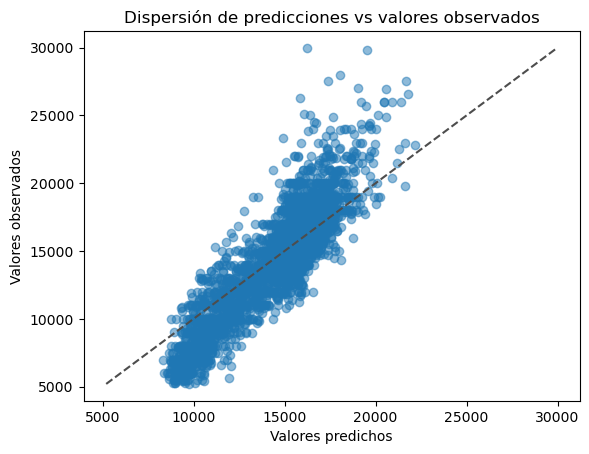

In [238]:
x_range = np.linspace(min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max()), 1000)

fig, ax = plt.subplots()
ax.plot(x_range, x_range, ls='--', c='.3')
ax.scatter(y_pred, y_test, alpha=.5)

ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')
ax.set_title('Dispersión de predicciones vs valores observados')

plt.show()

El modelo de Bagging con 10 arboles de decisión y max_features=int(np.log2(X_train.shape[1])) obtuvo un valor de MSE de 4030750.94, lo que indica que el modelo tiene una alta variabilidad en sus predicciones.

El valor del RMSE es de 2007.67, lo que sugiere que el modelo tiene un error medio de aproximadamente 2007.67 en la predicción de la variable objetivo.

El R2 del modelo es de 0.35, lo que indica que el modelo explica el 35.23% de la variación en la variable objetivo, lo cual es un resultado modesto.

En general, se puede concluir que el modelo de Bagging con los parametros solicitados disminuye su rendimiento comparado con el bagging manual que contempla todas las caracteristicas.

### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para clasificación  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 4
#Laura
# Crear un modelo de Random Forest con 100 árboles
rfc = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
rfc.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = rfc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))


KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 5
#Laura


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de clasificación con la librería sklearn y comenten sobre el desempeño del modelo.

In [1]:
# Celda 6
#Brayan
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier(n_estimators=100)
# Entrenar el modelo
xgb.fit(X_train, y_train)
# Predecir las etiquetas del conjunto de prueba
y_pred = xgb.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

ModuleNotFoundError: No module named 'xgboost'

Este es un excelente desempeño, ya que el modelo logra una precisión del 100% en el conjunto de prueba. El modelo XGBoost es conocido por su capacidad para lograr una precisión alta en tareas de clasificación y es una técnica popular en la competición de ciencia de datos. Además, el modelo XGBoost es capaz de manejar datos faltantes y es resistente al sobreajuste. En general, el modelo XGBoost es una técnica eficaz para mejorar la precisión y la estabilidad de los modelos de aprendizaje automático en tareas de clasificación.

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 7
#brayan

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
#Jesica


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1609d4bb-cd34-44d9-97c1-f7b3d6e00596' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>